In [7]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

XGBoost is a random forest that "grows" new trees (estimators) progressively

In [15]:
# import libraries

import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import pickle

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from scipy.integrate import odeint, solve_ivp
from scipy.fft import fft


import matplotlib.pylab as plt
import seaborn as sns
import mpl_interactions.ipyplot as iplt
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

# Machine Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils import Sequence
from tensorflow import keras

import shap as shap
try:
    import lime
    import lime.lime_tabular    
except ImportError:
    pass

%matplotlib inline


import matplotlib
import matplotlib.pyplot as plt

# for reproducibility of this notebook:
rng = np.random.RandomState(42)
#tf.random.set_seed(42)
np.random.seed(42)




In [16]:
# Configurations

Settings=["Base", "Random", "Energy","Gamma"]
Model_types=["True", "Complex", "Simple"]
Param_array = [{'alpha' : 1.0, 'beta' : 1.0, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2}, 
          {'alpha' : 1.0, 'beta' : -0.5, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2},
          {'alpha' : 1.0, 'beta' : -0.5, 'gamma' : 0.37, 'delta' : 1.0, 'omega' : 1.2}, 
          {'alpha' : 1.0, 'beta' : -0.5, 'gamma' : 0.5, 'delta' : 0.3, 'omega' : 1.2},
          {'alpha' : 1.0, 'beta' : -0.5, 'gamma' : 0.37, 'delta' : 0.0, 'omega' : 1.2},
          {'alpha' : -1.0, 'beta' : 1.0, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2},
          {'alpha' : -1.0, 'beta' : 1.0, 'gamma' : 0.37, 'delta' : 1.0, 'omega' : 1.2}, 
          {'alpha' : -1.0, 'beta' : 1.0, 'gamma' : 0.5, 'delta' : 0.3, 'omega' : 1.2},
          {'alpha' : -1.0, 'beta' : 1.0, 'gamma' : 0.0, 'delta' : 0.3, 'omega' : 0.0},
          {'alpha' : -1.0, 'beta' : -1.0, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2},
          {'alpha' : 0.0, 'beta' : 0.0, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2}]

In [17]:
i = 0
j = 1
k = 8

feature_setting = Settings[i]
model_setting = Model_types[j]
params = Param_array[k]

In [18]:
modelXGB = xgb.XGBRegressor(
    n_estimators = 5000,  # Maximum number of trees (like epochs for neural networks)
    max_depth = 3,  # Maximum tree depth
    eta = 0.01,  # Learning rate per tree
    subsample = 0.8,  # Sub-sample of the training set to use for each tree. Recommended [0.7, 1.0]
    )

In [19]:
def compile_and_fit_XGBoost(modelXGB, Xdata, Ydata, validation_split = 0.2,
                            early_stopping_rounds = 10, verbose = True):
    '''
    validation_split: percentage of training data to use for validation and monitor early stopping
    early_stopping_rounds: Minimum number of trees. After that, stop growing the forest if there is no improvement
    '''
    xtrain, xval, ytrain, yval = train_test_split(Xdata, Ydata, 
                                                  test_size = validation_split, random_state = None)
    evalset = [(xtrain, ytrain), (xval, yval)]
    
    modelXGB.fit(xtrain, ytrain, early_stopping_rounds = early_stopping_rounds, 
                 eval_metric='rmse', eval_set=evalset, verbose = verbose)

In [21]:
from Code.BaseDuffing import Duffing

In [28]:
# load dataset

duffing = Duffing(parameters = params)
eom = duffing.eom


features = duffing.features
labels = duffing.labels

# generate some data to train the scaler

end_time = 100
duffing.generate(10000, samples = 50, end_time = end_time)
duffing.scale_features()

#X = pd.DataFrame(duffing.scaler.inverse_transform(big_df[features]), columns = features)
#y = pd.DataFrame(duffing.predict(big_df[features]), columns = labels)

Generating Data…: 100%|██████████████| 10000/10000 [03:26<00:00, 48.36it/s]


In [29]:
X_train, X_test, y_train, y_test = train_test_split(duffing.X_df[features], duffing.X_df['xt'], test_size=0.33, random_state=42)

In [25]:
X = duffing.X_df[features]
y = duffing.X_df['xt']

In [10]:
# Dummy data. Y depends linearly on 4 features of x (the fifth feature is random and irrelevant)

N_train, N_test = 900,100

x_train = np.random.rand(N_train, 5)  
x_test = np.random.rand(N_test, 5)

# y plus random noise
y_train = [np.linalg.norm(x_train[i,:4]) for i in range(N_train)] + 0.01*np.random.randn(N_train)
y_test = [np.linalg.norm(x_test[i,:4]) for i in range(N_test)] + 0.01*np.random.randn(N_test)

In [30]:
compile_and_fit_XGBoost(modelXGB, X_train, y_train)

[0]	validation_0-rmse:1.10528	validation_1-rmse:1.10356
[1]	validation_0-rmse:1.10132	validation_1-rmse:1.09960
[2]	validation_0-rmse:1.09741	validation_1-rmse:1.09573
[3]	validation_0-rmse:1.09353	validation_1-rmse:1.09190
[4]	validation_0-rmse:1.08974	validation_1-rmse:1.08812
[5]	validation_0-rmse:1.08605	validation_1-rmse:1.08444
[6]	validation_0-rmse:1.08236	validation_1-rmse:1.08081
[7]	validation_0-rmse:1.07873	validation_1-rmse:1.07720
[8]	validation_0-rmse:1.07517	validation_1-rmse:1.07367
[9]	validation_0-rmse:1.07164	validation_1-rmse:1.07017
[10]	validation_0-rmse:1.06822	validation_1-rmse:1.06677
[11]	validation_0-rmse:1.06482	validation_1-rmse:1.06340
[12]	validation_0-rmse:1.06148	validation_1-rmse:1.06007
[13]	validation_0-rmse:1.05821	validation_1-rmse:1.05682
[14]	validation_0-rmse:1.05498	validation_1-rmse:1.05364
[15]	validation_0-rmse:1.05183	validation_1-rmse:1.05049
[16]	validation_0-rmse:1.04868	validation_1-rmse:1.04738
[17]	validation_0-rmse:1.04559	validation

[144]	validation_0-rmse:0.85175	validation_1-rmse:0.85199
[145]	validation_0-rmse:0.85110	validation_1-rmse:0.85134
[146]	validation_0-rmse:0.85053	validation_1-rmse:0.85077
[147]	validation_0-rmse:0.85003	validation_1-rmse:0.85026
[148]	validation_0-rmse:0.84943	validation_1-rmse:0.84967
[149]	validation_0-rmse:0.84884	validation_1-rmse:0.84908
[150]	validation_0-rmse:0.84822	validation_1-rmse:0.84847
[151]	validation_0-rmse:0.84765	validation_1-rmse:0.84790
[152]	validation_0-rmse:0.84706	validation_1-rmse:0.84730
[153]	validation_0-rmse:0.84668	validation_1-rmse:0.84691
[154]	validation_0-rmse:0.84613	validation_1-rmse:0.84636
[155]	validation_0-rmse:0.84558	validation_1-rmse:0.84581
[156]	validation_0-rmse:0.84506	validation_1-rmse:0.84529
[157]	validation_0-rmse:0.84449	validation_1-rmse:0.84473
[158]	validation_0-rmse:0.84397	validation_1-rmse:0.84420
[159]	validation_0-rmse:0.84361	validation_1-rmse:0.84383
[160]	validation_0-rmse:0.84302	validation_1-rmse:0.84325
[161]	validati

[286]	validation_0-rmse:0.76062	validation_1-rmse:0.76128
[287]	validation_0-rmse:0.75948	validation_1-rmse:0.76015
[288]	validation_0-rmse:0.75834	validation_1-rmse:0.75903
[289]	validation_0-rmse:0.75808	validation_1-rmse:0.75877
[290]	validation_0-rmse:0.75780	validation_1-rmse:0.75848
[291]	validation_0-rmse:0.75669	validation_1-rmse:0.75739
[292]	validation_0-rmse:0.75641	validation_1-rmse:0.75711
[293]	validation_0-rmse:0.75604	validation_1-rmse:0.75673
[294]	validation_0-rmse:0.75493	validation_1-rmse:0.75565
[295]	validation_0-rmse:0.75464	validation_1-rmse:0.75537
[296]	validation_0-rmse:0.75440	validation_1-rmse:0.75512
[297]	validation_0-rmse:0.75416	validation_1-rmse:0.75487
[298]	validation_0-rmse:0.75389	validation_1-rmse:0.75460
[299]	validation_0-rmse:0.75280	validation_1-rmse:0.75353
[300]	validation_0-rmse:0.75174	validation_1-rmse:0.75249
[301]	validation_0-rmse:0.75142	validation_1-rmse:0.75216
[302]	validation_0-rmse:0.75038	validation_1-rmse:0.75113
[303]	validati

[428]	validation_0-rmse:0.69067	validation_1-rmse:0.69176
[429]	validation_0-rmse:0.69051	validation_1-rmse:0.69159
[430]	validation_0-rmse:0.68981	validation_1-rmse:0.69089
[431]	validation_0-rmse:0.68961	validation_1-rmse:0.69070
[432]	validation_0-rmse:0.68936	validation_1-rmse:0.69044
[433]	validation_0-rmse:0.68865	validation_1-rmse:0.68973
[434]	validation_0-rmse:0.68848	validation_1-rmse:0.68956
[435]	validation_0-rmse:0.68823	validation_1-rmse:0.68930
[436]	validation_0-rmse:0.68799	validation_1-rmse:0.68906
[437]	validation_0-rmse:0.68729	validation_1-rmse:0.68837
[438]	validation_0-rmse:0.68706	validation_1-rmse:0.68814
[439]	validation_0-rmse:0.68683	validation_1-rmse:0.68791
[440]	validation_0-rmse:0.68615	validation_1-rmse:0.68724
[441]	validation_0-rmse:0.68590	validation_1-rmse:0.68698
[442]	validation_0-rmse:0.68563	validation_1-rmse:0.68671
[443]	validation_0-rmse:0.68495	validation_1-rmse:0.68602
[444]	validation_0-rmse:0.68421	validation_1-rmse:0.68531
[445]	validati

[570]	validation_0-rmse:0.63951	validation_1-rmse:0.64098
[571]	validation_0-rmse:0.63914	validation_1-rmse:0.64060
[572]	validation_0-rmse:0.63861	validation_1-rmse:0.64009
[573]	validation_0-rmse:0.63840	validation_1-rmse:0.63989
[574]	validation_0-rmse:0.63827	validation_1-rmse:0.63975
[575]	validation_0-rmse:0.63775	validation_1-rmse:0.63925
[576]	validation_0-rmse:0.63761	validation_1-rmse:0.63911
[577]	validation_0-rmse:0.63741	validation_1-rmse:0.63891
[578]	validation_0-rmse:0.63705	validation_1-rmse:0.63854
[579]	validation_0-rmse:0.63692	validation_1-rmse:0.63840
[580]	validation_0-rmse:0.63639	validation_1-rmse:0.63789
[581]	validation_0-rmse:0.63619	validation_1-rmse:0.63770
[582]	validation_0-rmse:0.63584	validation_1-rmse:0.63733
[583]	validation_0-rmse:0.63529	validation_1-rmse:0.63679
[584]	validation_0-rmse:0.63517	validation_1-rmse:0.63667
[585]	validation_0-rmse:0.63495	validation_1-rmse:0.63646
[586]	validation_0-rmse:0.63476	validation_1-rmse:0.63627
[587]	validati

[712]	validation_0-rmse:0.60388	validation_1-rmse:0.60574
[713]	validation_0-rmse:0.60372	validation_1-rmse:0.60558
[714]	validation_0-rmse:0.60365	validation_1-rmse:0.60551
[715]	validation_0-rmse:0.60333	validation_1-rmse:0.60519
[716]	validation_0-rmse:0.60325	validation_1-rmse:0.60512
[717]	validation_0-rmse:0.60316	validation_1-rmse:0.60502
[718]	validation_0-rmse:0.60278	validation_1-rmse:0.60464
[719]	validation_0-rmse:0.60251	validation_1-rmse:0.60437
[720]	validation_0-rmse:0.60240	validation_1-rmse:0.60427
[721]	validation_0-rmse:0.60225	validation_1-rmse:0.60412
[722]	validation_0-rmse:0.60210	validation_1-rmse:0.60397
[723]	validation_0-rmse:0.60177	validation_1-rmse:0.60365
[724]	validation_0-rmse:0.60167	validation_1-rmse:0.60355
[725]	validation_0-rmse:0.60138	validation_1-rmse:0.60326
[726]	validation_0-rmse:0.60123	validation_1-rmse:0.60311
[727]	validation_0-rmse:0.60085	validation_1-rmse:0.60274
[728]	validation_0-rmse:0.60047	validation_1-rmse:0.60239
[729]	validati

[854]	validation_0-rmse:0.57699	validation_1-rmse:0.57905
[855]	validation_0-rmse:0.57669	validation_1-rmse:0.57877
[856]	validation_0-rmse:0.57657	validation_1-rmse:0.57866
[857]	validation_0-rmse:0.57650	validation_1-rmse:0.57859
[858]	validation_0-rmse:0.57643	validation_1-rmse:0.57851
[859]	validation_0-rmse:0.57634	validation_1-rmse:0.57842
[860]	validation_0-rmse:0.57622	validation_1-rmse:0.57830
[861]	validation_0-rmse:0.57591	validation_1-rmse:0.57800
[862]	validation_0-rmse:0.57582	validation_1-rmse:0.57792
[863]	validation_0-rmse:0.57561	validation_1-rmse:0.57770
[864]	validation_0-rmse:0.57548	validation_1-rmse:0.57758
[865]	validation_0-rmse:0.57539	validation_1-rmse:0.57749
[866]	validation_0-rmse:0.57519	validation_1-rmse:0.57729
[867]	validation_0-rmse:0.57504	validation_1-rmse:0.57714
[868]	validation_0-rmse:0.57473	validation_1-rmse:0.57685
[869]	validation_0-rmse:0.57444	validation_1-rmse:0.57656
[870]	validation_0-rmse:0.57439	validation_1-rmse:0.57650
[871]	validati

[996]	validation_0-rmse:0.55609	validation_1-rmse:0.55834
[997]	validation_0-rmse:0.55582	validation_1-rmse:0.55807
[998]	validation_0-rmse:0.55577	validation_1-rmse:0.55802
[999]	validation_0-rmse:0.55565	validation_1-rmse:0.55791
[1000]	validation_0-rmse:0.55552	validation_1-rmse:0.55777
[1001]	validation_0-rmse:0.55533	validation_1-rmse:0.55759
[1002]	validation_0-rmse:0.55514	validation_1-rmse:0.55740
[1003]	validation_0-rmse:0.55501	validation_1-rmse:0.55728
[1004]	validation_0-rmse:0.55496	validation_1-rmse:0.55723
[1005]	validation_0-rmse:0.55487	validation_1-rmse:0.55714
[1006]	validation_0-rmse:0.55478	validation_1-rmse:0.55705
[1007]	validation_0-rmse:0.55466	validation_1-rmse:0.55693
[1008]	validation_0-rmse:0.55449	validation_1-rmse:0.55676
[1009]	validation_0-rmse:0.55436	validation_1-rmse:0.55663
[1010]	validation_0-rmse:0.55418	validation_1-rmse:0.55645
[1011]	validation_0-rmse:0.55391	validation_1-rmse:0.55618
[1012]	validation_0-rmse:0.55365	validation_1-rmse:0.55592
[

[1135]	validation_0-rmse:0.54022	validation_1-rmse:0.54251
[1136]	validation_0-rmse:0.54012	validation_1-rmse:0.54241
[1137]	validation_0-rmse:0.54001	validation_1-rmse:0.54231
[1138]	validation_0-rmse:0.53997	validation_1-rmse:0.54226
[1139]	validation_0-rmse:0.53991	validation_1-rmse:0.54221
[1140]	validation_0-rmse:0.53988	validation_1-rmse:0.54218
[1141]	validation_0-rmse:0.53982	validation_1-rmse:0.54212
[1142]	validation_0-rmse:0.53959	validation_1-rmse:0.54189
[1143]	validation_0-rmse:0.53938	validation_1-rmse:0.54168
[1144]	validation_0-rmse:0.53930	validation_1-rmse:0.54160
[1145]	validation_0-rmse:0.53920	validation_1-rmse:0.54151
[1146]	validation_0-rmse:0.53911	validation_1-rmse:0.54142
[1147]	validation_0-rmse:0.53904	validation_1-rmse:0.54135
[1148]	validation_0-rmse:0.53900	validation_1-rmse:0.54131
[1149]	validation_0-rmse:0.53896	validation_1-rmse:0.54128
[1150]	validation_0-rmse:0.53893	validation_1-rmse:0.54124
[1151]	validation_0-rmse:0.53873	validation_1-rmse:0.541

[1274]	validation_0-rmse:0.52796	validation_1-rmse:0.53028
[1275]	validation_0-rmse:0.52788	validation_1-rmse:0.53020
[1276]	validation_0-rmse:0.52778	validation_1-rmse:0.53009
[1277]	validation_0-rmse:0.52769	validation_1-rmse:0.52999
[1278]	validation_0-rmse:0.52760	validation_1-rmse:0.52990
[1279]	validation_0-rmse:0.52751	validation_1-rmse:0.52982
[1280]	validation_0-rmse:0.52734	validation_1-rmse:0.52965
[1281]	validation_0-rmse:0.52725	validation_1-rmse:0.52955
[1282]	validation_0-rmse:0.52716	validation_1-rmse:0.52946
[1283]	validation_0-rmse:0.52707	validation_1-rmse:0.52937
[1284]	validation_0-rmse:0.52699	validation_1-rmse:0.52930
[1285]	validation_0-rmse:0.52691	validation_1-rmse:0.52922
[1286]	validation_0-rmse:0.52682	validation_1-rmse:0.52913
[1287]	validation_0-rmse:0.52679	validation_1-rmse:0.52910
[1288]	validation_0-rmse:0.52672	validation_1-rmse:0.52902
[1289]	validation_0-rmse:0.52670	validation_1-rmse:0.52900
[1290]	validation_0-rmse:0.52663	validation_1-rmse:0.528

[1413]	validation_0-rmse:0.51794	validation_1-rmse:0.52027
[1414]	validation_0-rmse:0.51788	validation_1-rmse:0.52021
[1415]	validation_0-rmse:0.51777	validation_1-rmse:0.52010
[1416]	validation_0-rmse:0.51770	validation_1-rmse:0.52003
[1417]	validation_0-rmse:0.51768	validation_1-rmse:0.52002
[1418]	validation_0-rmse:0.51767	validation_1-rmse:0.52000
[1419]	validation_0-rmse:0.51760	validation_1-rmse:0.51993
[1420]	validation_0-rmse:0.51758	validation_1-rmse:0.51991
[1421]	validation_0-rmse:0.51752	validation_1-rmse:0.51985
[1422]	validation_0-rmse:0.51750	validation_1-rmse:0.51983
[1423]	validation_0-rmse:0.51743	validation_1-rmse:0.51975
[1424]	validation_0-rmse:0.51735	validation_1-rmse:0.51968
[1425]	validation_0-rmse:0.51732	validation_1-rmse:0.51964
[1426]	validation_0-rmse:0.51730	validation_1-rmse:0.51962
[1427]	validation_0-rmse:0.51728	validation_1-rmse:0.51960
[1428]	validation_0-rmse:0.51726	validation_1-rmse:0.51959
[1429]	validation_0-rmse:0.51725	validation_1-rmse:0.519

[1552]	validation_0-rmse:0.50938	validation_1-rmse:0.51165
[1553]	validation_0-rmse:0.50932	validation_1-rmse:0.51159
[1554]	validation_0-rmse:0.50930	validation_1-rmse:0.51156
[1555]	validation_0-rmse:0.50921	validation_1-rmse:0.51148
[1556]	validation_0-rmse:0.50909	validation_1-rmse:0.51135
[1557]	validation_0-rmse:0.50899	validation_1-rmse:0.51126
[1558]	validation_0-rmse:0.50894	validation_1-rmse:0.51120
[1559]	validation_0-rmse:0.50887	validation_1-rmse:0.51113
[1560]	validation_0-rmse:0.50886	validation_1-rmse:0.51113
[1561]	validation_0-rmse:0.50879	validation_1-rmse:0.51104
[1562]	validation_0-rmse:0.50877	validation_1-rmse:0.51103
[1563]	validation_0-rmse:0.50871	validation_1-rmse:0.51097
[1564]	validation_0-rmse:0.50861	validation_1-rmse:0.51087
[1565]	validation_0-rmse:0.50855	validation_1-rmse:0.51081
[1566]	validation_0-rmse:0.50853	validation_1-rmse:0.51079
[1567]	validation_0-rmse:0.50852	validation_1-rmse:0.51078
[1568]	validation_0-rmse:0.50840	validation_1-rmse:0.510

[1691]	validation_0-rmse:0.50197	validation_1-rmse:0.50424
[1692]	validation_0-rmse:0.50185	validation_1-rmse:0.50412
[1693]	validation_0-rmse:0.50174	validation_1-rmse:0.50401
[1694]	validation_0-rmse:0.50174	validation_1-rmse:0.50401
[1695]	validation_0-rmse:0.50174	validation_1-rmse:0.50400
[1696]	validation_0-rmse:0.50173	validation_1-rmse:0.50400
[1697]	validation_0-rmse:0.50166	validation_1-rmse:0.50393
[1698]	validation_0-rmse:0.50164	validation_1-rmse:0.50391
[1699]	validation_0-rmse:0.50150	validation_1-rmse:0.50376
[1700]	validation_0-rmse:0.50145	validation_1-rmse:0.50371
[1701]	validation_0-rmse:0.50139	validation_1-rmse:0.50366
[1702]	validation_0-rmse:0.50137	validation_1-rmse:0.50364
[1703]	validation_0-rmse:0.50125	validation_1-rmse:0.50352
[1704]	validation_0-rmse:0.50119	validation_1-rmse:0.50347
[1705]	validation_0-rmse:0.50109	validation_1-rmse:0.50336
[1706]	validation_0-rmse:0.50108	validation_1-rmse:0.50336
[1707]	validation_0-rmse:0.50099	validation_1-rmse:0.503

[1830]	validation_0-rmse:0.49552	validation_1-rmse:0.49778
[1831]	validation_0-rmse:0.49546	validation_1-rmse:0.49773
[1832]	validation_0-rmse:0.49544	validation_1-rmse:0.49771
[1833]	validation_0-rmse:0.49540	validation_1-rmse:0.49767
[1834]	validation_0-rmse:0.49539	validation_1-rmse:0.49766
[1835]	validation_0-rmse:0.49533	validation_1-rmse:0.49761
[1836]	validation_0-rmse:0.49531	validation_1-rmse:0.49759
[1837]	validation_0-rmse:0.49527	validation_1-rmse:0.49755
[1838]	validation_0-rmse:0.49526	validation_1-rmse:0.49753
[1839]	validation_0-rmse:0.49523	validation_1-rmse:0.49751
[1840]	validation_0-rmse:0.49523	validation_1-rmse:0.49750
[1841]	validation_0-rmse:0.49516	validation_1-rmse:0.49743
[1842]	validation_0-rmse:0.49516	validation_1-rmse:0.49743
[1843]	validation_0-rmse:0.49516	validation_1-rmse:0.49743
[1844]	validation_0-rmse:0.49515	validation_1-rmse:0.49743
[1845]	validation_0-rmse:0.49514	validation_1-rmse:0.49741
[1846]	validation_0-rmse:0.49512	validation_1-rmse:0.497

[1968]	validation_0-rmse:0.49038	validation_1-rmse:0.49269
[1969]	validation_0-rmse:0.49034	validation_1-rmse:0.49265
[1970]	validation_0-rmse:0.49033	validation_1-rmse:0.49264
[1971]	validation_0-rmse:0.49032	validation_1-rmse:0.49263
[1972]	validation_0-rmse:0.49031	validation_1-rmse:0.49262
[1973]	validation_0-rmse:0.49030	validation_1-rmse:0.49261
[1974]	validation_0-rmse:0.49029	validation_1-rmse:0.49260
[1975]	validation_0-rmse:0.49028	validation_1-rmse:0.49259
[1976]	validation_0-rmse:0.49026	validation_1-rmse:0.49257
[1977]	validation_0-rmse:0.49022	validation_1-rmse:0.49253
[1978]	validation_0-rmse:0.49021	validation_1-rmse:0.49252
[1979]	validation_0-rmse:0.49021	validation_1-rmse:0.49251
[1980]	validation_0-rmse:0.49013	validation_1-rmse:0.49244
[1981]	validation_0-rmse:0.49010	validation_1-rmse:0.49241
[1982]	validation_0-rmse:0.49006	validation_1-rmse:0.49237
[1983]	validation_0-rmse:0.49005	validation_1-rmse:0.49236
[1984]	validation_0-rmse:0.49002	validation_1-rmse:0.492

[2106]	validation_0-rmse:0.48509	validation_1-rmse:0.48742
[2107]	validation_0-rmse:0.48505	validation_1-rmse:0.48738
[2108]	validation_0-rmse:0.48500	validation_1-rmse:0.48734
[2109]	validation_0-rmse:0.48497	validation_1-rmse:0.48730
[2110]	validation_0-rmse:0.48489	validation_1-rmse:0.48722
[2111]	validation_0-rmse:0.48488	validation_1-rmse:0.48721
[2112]	validation_0-rmse:0.48488	validation_1-rmse:0.48721
[2113]	validation_0-rmse:0.48487	validation_1-rmse:0.48721
[2114]	validation_0-rmse:0.48486	validation_1-rmse:0.48720
[2115]	validation_0-rmse:0.48483	validation_1-rmse:0.48716
[2116]	validation_0-rmse:0.48480	validation_1-rmse:0.48714
[2117]	validation_0-rmse:0.48468	validation_1-rmse:0.48702
[2118]	validation_0-rmse:0.48464	validation_1-rmse:0.48698
[2119]	validation_0-rmse:0.48463	validation_1-rmse:0.48697
[2120]	validation_0-rmse:0.48463	validation_1-rmse:0.48697
[2121]	validation_0-rmse:0.48457	validation_1-rmse:0.48691
[2122]	validation_0-rmse:0.48454	validation_1-rmse:0.486

[2244]	validation_0-rmse:0.47932	validation_1-rmse:0.48168
[2245]	validation_0-rmse:0.47930	validation_1-rmse:0.48166
[2246]	validation_0-rmse:0.47928	validation_1-rmse:0.48164
[2247]	validation_0-rmse:0.47927	validation_1-rmse:0.48163
[2248]	validation_0-rmse:0.47920	validation_1-rmse:0.48156
[2249]	validation_0-rmse:0.47919	validation_1-rmse:0.48154
[2250]	validation_0-rmse:0.47916	validation_1-rmse:0.48152
[2251]	validation_0-rmse:0.47914	validation_1-rmse:0.48149
[2252]	validation_0-rmse:0.47912	validation_1-rmse:0.48147
[2253]	validation_0-rmse:0.47900	validation_1-rmse:0.48135
[2254]	validation_0-rmse:0.47898	validation_1-rmse:0.48133
[2255]	validation_0-rmse:0.47880	validation_1-rmse:0.48115
[2256]	validation_0-rmse:0.47877	validation_1-rmse:0.48112
[2257]	validation_0-rmse:0.47874	validation_1-rmse:0.48109
[2258]	validation_0-rmse:0.47873	validation_1-rmse:0.48108
[2259]	validation_0-rmse:0.47862	validation_1-rmse:0.48097
[2260]	validation_0-rmse:0.47860	validation_1-rmse:0.480

[2383]	validation_0-rmse:0.47140	validation_1-rmse:0.47375
[2384]	validation_0-rmse:0.47132	validation_1-rmse:0.47367
[2385]	validation_0-rmse:0.47130	validation_1-rmse:0.47365
[2386]	validation_0-rmse:0.47127	validation_1-rmse:0.47362
[2387]	validation_0-rmse:0.47125	validation_1-rmse:0.47360
[2388]	validation_0-rmse:0.47121	validation_1-rmse:0.47357
[2389]	validation_0-rmse:0.47119	validation_1-rmse:0.47354
[2390]	validation_0-rmse:0.47117	validation_1-rmse:0.47352
[2391]	validation_0-rmse:0.47107	validation_1-rmse:0.47342
[2392]	validation_0-rmse:0.47102	validation_1-rmse:0.47337
[2393]	validation_0-rmse:0.47100	validation_1-rmse:0.47336
[2394]	validation_0-rmse:0.47090	validation_1-rmse:0.47326
[2395]	validation_0-rmse:0.47088	validation_1-rmse:0.47324
[2396]	validation_0-rmse:0.47080	validation_1-rmse:0.47316
[2397]	validation_0-rmse:0.47080	validation_1-rmse:0.47316
[2398]	validation_0-rmse:0.47079	validation_1-rmse:0.47315
[2399]	validation_0-rmse:0.47078	validation_1-rmse:0.473

[2522]	validation_0-rmse:0.46552	validation_1-rmse:0.46790
[2523]	validation_0-rmse:0.46550	validation_1-rmse:0.46787
[2524]	validation_0-rmse:0.46546	validation_1-rmse:0.46784
[2525]	validation_0-rmse:0.46545	validation_1-rmse:0.46783
[2526]	validation_0-rmse:0.46544	validation_1-rmse:0.46782
[2527]	validation_0-rmse:0.46543	validation_1-rmse:0.46781
[2528]	validation_0-rmse:0.46533	validation_1-rmse:0.46770
[2529]	validation_0-rmse:0.46516	validation_1-rmse:0.46754
[2530]	validation_0-rmse:0.46514	validation_1-rmse:0.46751
[2531]	validation_0-rmse:0.46513	validation_1-rmse:0.46750
[2532]	validation_0-rmse:0.46512	validation_1-rmse:0.46749
[2533]	validation_0-rmse:0.46510	validation_1-rmse:0.46747
[2534]	validation_0-rmse:0.46506	validation_1-rmse:0.46743
[2535]	validation_0-rmse:0.46496	validation_1-rmse:0.46733
[2536]	validation_0-rmse:0.46492	validation_1-rmse:0.46730
[2537]	validation_0-rmse:0.46491	validation_1-rmse:0.46728
[2538]	validation_0-rmse:0.46489	validation_1-rmse:0.467

[2661]	validation_0-rmse:0.45988	validation_1-rmse:0.46231
[2662]	validation_0-rmse:0.45987	validation_1-rmse:0.46231
[2663]	validation_0-rmse:0.45987	validation_1-rmse:0.46230
[2664]	validation_0-rmse:0.45985	validation_1-rmse:0.46228
[2665]	validation_0-rmse:0.45975	validation_1-rmse:0.46219
[2666]	validation_0-rmse:0.45974	validation_1-rmse:0.46218
[2667]	validation_0-rmse:0.45971	validation_1-rmse:0.46215
[2668]	validation_0-rmse:0.45970	validation_1-rmse:0.46214
[2669]	validation_0-rmse:0.45968	validation_1-rmse:0.46212
[2670]	validation_0-rmse:0.45965	validation_1-rmse:0.46209
[2671]	validation_0-rmse:0.45964	validation_1-rmse:0.46208
[2672]	validation_0-rmse:0.45963	validation_1-rmse:0.46207
[2673]	validation_0-rmse:0.45963	validation_1-rmse:0.46207
[2674]	validation_0-rmse:0.45959	validation_1-rmse:0.46203
[2675]	validation_0-rmse:0.45957	validation_1-rmse:0.46201
[2676]	validation_0-rmse:0.45956	validation_1-rmse:0.46201
[2677]	validation_0-rmse:0.45953	validation_1-rmse:0.461

[2800]	validation_0-rmse:0.45500	validation_1-rmse:0.45748
[2801]	validation_0-rmse:0.45498	validation_1-rmse:0.45746
[2802]	validation_0-rmse:0.45495	validation_1-rmse:0.45743
[2803]	validation_0-rmse:0.45495	validation_1-rmse:0.45743
[2804]	validation_0-rmse:0.45494	validation_1-rmse:0.45742
[2805]	validation_0-rmse:0.45488	validation_1-rmse:0.45736
[2806]	validation_0-rmse:0.45487	validation_1-rmse:0.45735
[2807]	validation_0-rmse:0.45486	validation_1-rmse:0.45733
[2808]	validation_0-rmse:0.45485	validation_1-rmse:0.45733
[2809]	validation_0-rmse:0.45484	validation_1-rmse:0.45732
[2810]	validation_0-rmse:0.45478	validation_1-rmse:0.45726
[2811]	validation_0-rmse:0.45478	validation_1-rmse:0.45726
[2812]	validation_0-rmse:0.45475	validation_1-rmse:0.45722
[2813]	validation_0-rmse:0.45472	validation_1-rmse:0.45720
[2814]	validation_0-rmse:0.45468	validation_1-rmse:0.45715
[2815]	validation_0-rmse:0.45465	validation_1-rmse:0.45713
[2816]	validation_0-rmse:0.45463	validation_1-rmse:0.457

[2939]	validation_0-rmse:0.44976	validation_1-rmse:0.45226
[2940]	validation_0-rmse:0.44974	validation_1-rmse:0.45224
[2941]	validation_0-rmse:0.44968	validation_1-rmse:0.45219
[2942]	validation_0-rmse:0.44966	validation_1-rmse:0.45217
[2943]	validation_0-rmse:0.44958	validation_1-rmse:0.45208
[2944]	validation_0-rmse:0.44950	validation_1-rmse:0.45201
[2945]	validation_0-rmse:0.44943	validation_1-rmse:0.45193
[2946]	validation_0-rmse:0.44937	validation_1-rmse:0.45187
[2947]	validation_0-rmse:0.44931	validation_1-rmse:0.45182
[2948]	validation_0-rmse:0.44924	validation_1-rmse:0.45175
[2949]	validation_0-rmse:0.44923	validation_1-rmse:0.45173
[2950]	validation_0-rmse:0.44919	validation_1-rmse:0.45170
[2951]	validation_0-rmse:0.44917	validation_1-rmse:0.45168
[2952]	validation_0-rmse:0.44916	validation_1-rmse:0.45168
[2953]	validation_0-rmse:0.44916	validation_1-rmse:0.45167
[2954]	validation_0-rmse:0.44914	validation_1-rmse:0.45165
[2955]	validation_0-rmse:0.44910	validation_1-rmse:0.451

[3078]	validation_0-rmse:0.44382	validation_1-rmse:0.44638
[3079]	validation_0-rmse:0.44376	validation_1-rmse:0.44632
[3080]	validation_0-rmse:0.44374	validation_1-rmse:0.44630
[3081]	validation_0-rmse:0.44365	validation_1-rmse:0.44621
[3082]	validation_0-rmse:0.44364	validation_1-rmse:0.44620
[3083]	validation_0-rmse:0.44363	validation_1-rmse:0.44619
[3084]	validation_0-rmse:0.44358	validation_1-rmse:0.44614
[3085]	validation_0-rmse:0.44357	validation_1-rmse:0.44613
[3086]	validation_0-rmse:0.44356	validation_1-rmse:0.44612
[3087]	validation_0-rmse:0.44351	validation_1-rmse:0.44607
[3088]	validation_0-rmse:0.44349	validation_1-rmse:0.44605
[3089]	validation_0-rmse:0.44348	validation_1-rmse:0.44604
[3090]	validation_0-rmse:0.44339	validation_1-rmse:0.44596
[3091]	validation_0-rmse:0.44331	validation_1-rmse:0.44588
[3092]	validation_0-rmse:0.44323	validation_1-rmse:0.44580
[3093]	validation_0-rmse:0.44321	validation_1-rmse:0.44577
[3094]	validation_0-rmse:0.44315	validation_1-rmse:0.445

[3217]	validation_0-rmse:0.43856	validation_1-rmse:0.44117
[3218]	validation_0-rmse:0.43852	validation_1-rmse:0.44114
[3219]	validation_0-rmse:0.43850	validation_1-rmse:0.44112
[3220]	validation_0-rmse:0.43849	validation_1-rmse:0.44111
[3221]	validation_0-rmse:0.43845	validation_1-rmse:0.44107
[3222]	validation_0-rmse:0.43843	validation_1-rmse:0.44105
[3223]	validation_0-rmse:0.43840	validation_1-rmse:0.44101
[3224]	validation_0-rmse:0.43837	validation_1-rmse:0.44098
[3225]	validation_0-rmse:0.43835	validation_1-rmse:0.44096
[3226]	validation_0-rmse:0.43833	validation_1-rmse:0.44094
[3227]	validation_0-rmse:0.43827	validation_1-rmse:0.44089
[3228]	validation_0-rmse:0.43824	validation_1-rmse:0.44087
[3229]	validation_0-rmse:0.43824	validation_1-rmse:0.44086
[3230]	validation_0-rmse:0.43822	validation_1-rmse:0.44084
[3231]	validation_0-rmse:0.43819	validation_1-rmse:0.44081
[3232]	validation_0-rmse:0.43818	validation_1-rmse:0.44080
[3233]	validation_0-rmse:0.43818	validation_1-rmse:0.440

[3356]	validation_0-rmse:0.43475	validation_1-rmse:0.43739
[3357]	validation_0-rmse:0.43472	validation_1-rmse:0.43736
[3358]	validation_0-rmse:0.43471	validation_1-rmse:0.43734
[3359]	validation_0-rmse:0.43463	validation_1-rmse:0.43727
[3360]	validation_0-rmse:0.43462	validation_1-rmse:0.43726
[3361]	validation_0-rmse:0.43460	validation_1-rmse:0.43724
[3362]	validation_0-rmse:0.43458	validation_1-rmse:0.43722
[3363]	validation_0-rmse:0.43457	validation_1-rmse:0.43721
[3364]	validation_0-rmse:0.43456	validation_1-rmse:0.43721
[3365]	validation_0-rmse:0.43451	validation_1-rmse:0.43715
[3366]	validation_0-rmse:0.43450	validation_1-rmse:0.43714
[3367]	validation_0-rmse:0.43448	validation_1-rmse:0.43712
[3368]	validation_0-rmse:0.43444	validation_1-rmse:0.43708
[3369]	validation_0-rmse:0.43440	validation_1-rmse:0.43704
[3370]	validation_0-rmse:0.43438	validation_1-rmse:0.43702
[3371]	validation_0-rmse:0.43432	validation_1-rmse:0.43696
[3372]	validation_0-rmse:0.43430	validation_1-rmse:0.436

[3495]	validation_0-rmse:0.43105	validation_1-rmse:0.43375
[3496]	validation_0-rmse:0.43103	validation_1-rmse:0.43373
[3497]	validation_0-rmse:0.43102	validation_1-rmse:0.43372
[3498]	validation_0-rmse:0.43096	validation_1-rmse:0.43366
[3499]	validation_0-rmse:0.43094	validation_1-rmse:0.43365
[3500]	validation_0-rmse:0.43085	validation_1-rmse:0.43356
[3501]	validation_0-rmse:0.43084	validation_1-rmse:0.43354
[3502]	validation_0-rmse:0.43082	validation_1-rmse:0.43352
[3503]	validation_0-rmse:0.43076	validation_1-rmse:0.43347
[3504]	validation_0-rmse:0.43075	validation_1-rmse:0.43346
[3505]	validation_0-rmse:0.43074	validation_1-rmse:0.43345
[3506]	validation_0-rmse:0.43068	validation_1-rmse:0.43339
[3507]	validation_0-rmse:0.43066	validation_1-rmse:0.43337
[3508]	validation_0-rmse:0.43063	validation_1-rmse:0.43334
[3509]	validation_0-rmse:0.43061	validation_1-rmse:0.43332
[3510]	validation_0-rmse:0.43059	validation_1-rmse:0.43329
[3511]	validation_0-rmse:0.43053	validation_1-rmse:0.433

[3634]	validation_0-rmse:0.42662	validation_1-rmse:0.42939
[3635]	validation_0-rmse:0.42661	validation_1-rmse:0.42939
[3636]	validation_0-rmse:0.42660	validation_1-rmse:0.42937
[3637]	validation_0-rmse:0.42657	validation_1-rmse:0.42935
[3638]	validation_0-rmse:0.42650	validation_1-rmse:0.42927
[3639]	validation_0-rmse:0.42647	validation_1-rmse:0.42925
[3640]	validation_0-rmse:0.42644	validation_1-rmse:0.42923
[3641]	validation_0-rmse:0.42644	validation_1-rmse:0.42922
[3642]	validation_0-rmse:0.42641	validation_1-rmse:0.42919
[3643]	validation_0-rmse:0.42640	validation_1-rmse:0.42918
[3644]	validation_0-rmse:0.42638	validation_1-rmse:0.42916
[3645]	validation_0-rmse:0.42636	validation_1-rmse:0.42914
[3646]	validation_0-rmse:0.42634	validation_1-rmse:0.42911
[3647]	validation_0-rmse:0.42628	validation_1-rmse:0.42906
[3648]	validation_0-rmse:0.42626	validation_1-rmse:0.42904
[3649]	validation_0-rmse:0.42622	validation_1-rmse:0.42900
[3650]	validation_0-rmse:0.42621	validation_1-rmse:0.428

[3773]	validation_0-rmse:0.42335	validation_1-rmse:0.42616
[3774]	validation_0-rmse:0.42331	validation_1-rmse:0.42612
[3775]	validation_0-rmse:0.42327	validation_1-rmse:0.42608
[3776]	validation_0-rmse:0.42326	validation_1-rmse:0.42607
[3777]	validation_0-rmse:0.42325	validation_1-rmse:0.42605
[3778]	validation_0-rmse:0.42323	validation_1-rmse:0.42604
[3779]	validation_0-rmse:0.42322	validation_1-rmse:0.42603
[3780]	validation_0-rmse:0.42319	validation_1-rmse:0.42599
[3781]	validation_0-rmse:0.42315	validation_1-rmse:0.42596
[3782]	validation_0-rmse:0.42312	validation_1-rmse:0.42592
[3783]	validation_0-rmse:0.42310	validation_1-rmse:0.42591
[3784]	validation_0-rmse:0.42306	validation_1-rmse:0.42587
[3785]	validation_0-rmse:0.42303	validation_1-rmse:0.42584
[3786]	validation_0-rmse:0.42302	validation_1-rmse:0.42583
[3787]	validation_0-rmse:0.42301	validation_1-rmse:0.42581
[3788]	validation_0-rmse:0.42298	validation_1-rmse:0.42579
[3789]	validation_0-rmse:0.42297	validation_1-rmse:0.425

[3912]	validation_0-rmse:0.42004	validation_1-rmse:0.42287
[3913]	validation_0-rmse:0.42002	validation_1-rmse:0.42286
[3914]	validation_0-rmse:0.42000	validation_1-rmse:0.42284
[3915]	validation_0-rmse:0.41996	validation_1-rmse:0.42279
[3916]	validation_0-rmse:0.41992	validation_1-rmse:0.42276
[3917]	validation_0-rmse:0.41989	validation_1-rmse:0.42273
[3918]	validation_0-rmse:0.41985	validation_1-rmse:0.42269
[3919]	validation_0-rmse:0.41981	validation_1-rmse:0.42266
[3920]	validation_0-rmse:0.41980	validation_1-rmse:0.42264
[3921]	validation_0-rmse:0.41976	validation_1-rmse:0.42261
[3922]	validation_0-rmse:0.41973	validation_1-rmse:0.42258
[3923]	validation_0-rmse:0.41972	validation_1-rmse:0.42257
[3924]	validation_0-rmse:0.41971	validation_1-rmse:0.42256
[3925]	validation_0-rmse:0.41964	validation_1-rmse:0.42249
[3926]	validation_0-rmse:0.41960	validation_1-rmse:0.42245
[3927]	validation_0-rmse:0.41959	validation_1-rmse:0.42244
[3928]	validation_0-rmse:0.41958	validation_1-rmse:0.422

[4051]	validation_0-rmse:0.41690	validation_1-rmse:0.41979
[4052]	validation_0-rmse:0.41689	validation_1-rmse:0.41979
[4053]	validation_0-rmse:0.41684	validation_1-rmse:0.41973
[4054]	validation_0-rmse:0.41683	validation_1-rmse:0.41972
[4055]	validation_0-rmse:0.41678	validation_1-rmse:0.41967
[4056]	validation_0-rmse:0.41676	validation_1-rmse:0.41966
[4057]	validation_0-rmse:0.41674	validation_1-rmse:0.41963
[4058]	validation_0-rmse:0.41673	validation_1-rmse:0.41962
[4059]	validation_0-rmse:0.41672	validation_1-rmse:0.41962
[4060]	validation_0-rmse:0.41665	validation_1-rmse:0.41955
[4061]	validation_0-rmse:0.41664	validation_1-rmse:0.41954
[4062]	validation_0-rmse:0.41663	validation_1-rmse:0.41953
[4063]	validation_0-rmse:0.41662	validation_1-rmse:0.41951
[4064]	validation_0-rmse:0.41658	validation_1-rmse:0.41947
[4065]	validation_0-rmse:0.41657	validation_1-rmse:0.41946
[4066]	validation_0-rmse:0.41656	validation_1-rmse:0.41945
[4067]	validation_0-rmse:0.41654	validation_1-rmse:0.419

[4190]	validation_0-rmse:0.41317	validation_1-rmse:0.41612
[4191]	validation_0-rmse:0.41313	validation_1-rmse:0.41608
[4192]	validation_0-rmse:0.41311	validation_1-rmse:0.41606
[4193]	validation_0-rmse:0.41305	validation_1-rmse:0.41601
[4194]	validation_0-rmse:0.41303	validation_1-rmse:0.41598
[4195]	validation_0-rmse:0.41300	validation_1-rmse:0.41596
[4196]	validation_0-rmse:0.41297	validation_1-rmse:0.41592
[4197]	validation_0-rmse:0.41295	validation_1-rmse:0.41591
[4198]	validation_0-rmse:0.41294	validation_1-rmse:0.41590
[4199]	validation_0-rmse:0.41293	validation_1-rmse:0.41589
[4200]	validation_0-rmse:0.41292	validation_1-rmse:0.41588
[4201]	validation_0-rmse:0.41292	validation_1-rmse:0.41587
[4202]	validation_0-rmse:0.41284	validation_1-rmse:0.41580
[4203]	validation_0-rmse:0.41283	validation_1-rmse:0.41579
[4204]	validation_0-rmse:0.41282	validation_1-rmse:0.41578
[4205]	validation_0-rmse:0.41281	validation_1-rmse:0.41577
[4206]	validation_0-rmse:0.41280	validation_1-rmse:0.415

[4329]	validation_0-rmse:0.40977	validation_1-rmse:0.41284
[4330]	validation_0-rmse:0.40976	validation_1-rmse:0.41284
[4331]	validation_0-rmse:0.40973	validation_1-rmse:0.41280
[4332]	validation_0-rmse:0.40972	validation_1-rmse:0.41280
[4333]	validation_0-rmse:0.40966	validation_1-rmse:0.41273
[4334]	validation_0-rmse:0.40964	validation_1-rmse:0.41271
[4335]	validation_0-rmse:0.40963	validation_1-rmse:0.41271
[4336]	validation_0-rmse:0.40962	validation_1-rmse:0.41269
[4337]	validation_0-rmse:0.40959	validation_1-rmse:0.41266
[4338]	validation_0-rmse:0.40958	validation_1-rmse:0.41265
[4339]	validation_0-rmse:0.40957	validation_1-rmse:0.41264
[4340]	validation_0-rmse:0.40956	validation_1-rmse:0.41263
[4341]	validation_0-rmse:0.40953	validation_1-rmse:0.41261
[4342]	validation_0-rmse:0.40950	validation_1-rmse:0.41258
[4343]	validation_0-rmse:0.40949	validation_1-rmse:0.41257
[4344]	validation_0-rmse:0.40948	validation_1-rmse:0.41256
[4345]	validation_0-rmse:0.40945	validation_1-rmse:0.412

[4468]	validation_0-rmse:0.40574	validation_1-rmse:0.40891
[4469]	validation_0-rmse:0.40573	validation_1-rmse:0.40891
[4470]	validation_0-rmse:0.40570	validation_1-rmse:0.40888
[4471]	validation_0-rmse:0.40566	validation_1-rmse:0.40884
[4472]	validation_0-rmse:0.40559	validation_1-rmse:0.40876
[4473]	validation_0-rmse:0.40557	validation_1-rmse:0.40875
[4474]	validation_0-rmse:0.40549	validation_1-rmse:0.40868
[4475]	validation_0-rmse:0.40542	validation_1-rmse:0.40861
[4476]	validation_0-rmse:0.40539	validation_1-rmse:0.40857
[4477]	validation_0-rmse:0.40536	validation_1-rmse:0.40855
[4478]	validation_0-rmse:0.40535	validation_1-rmse:0.40854
[4479]	validation_0-rmse:0.40531	validation_1-rmse:0.40850
[4480]	validation_0-rmse:0.40526	validation_1-rmse:0.40845
[4481]	validation_0-rmse:0.40519	validation_1-rmse:0.40838
[4482]	validation_0-rmse:0.40517	validation_1-rmse:0.40837
[4483]	validation_0-rmse:0.40516	validation_1-rmse:0.40835
[4484]	validation_0-rmse:0.40509	validation_1-rmse:0.408

[4607]	validation_0-rmse:0.40198	validation_1-rmse:0.40523
[4608]	validation_0-rmse:0.40197	validation_1-rmse:0.40522
[4609]	validation_0-rmse:0.40196	validation_1-rmse:0.40520
[4610]	validation_0-rmse:0.40195	validation_1-rmse:0.40519
[4611]	validation_0-rmse:0.40194	validation_1-rmse:0.40518
[4612]	validation_0-rmse:0.40193	validation_1-rmse:0.40518
[4613]	validation_0-rmse:0.40191	validation_1-rmse:0.40515
[4614]	validation_0-rmse:0.40190	validation_1-rmse:0.40515
[4615]	validation_0-rmse:0.40189	validation_1-rmse:0.40513
[4616]	validation_0-rmse:0.40186	validation_1-rmse:0.40510
[4617]	validation_0-rmse:0.40185	validation_1-rmse:0.40509
[4618]	validation_0-rmse:0.40184	validation_1-rmse:0.40508
[4619]	validation_0-rmse:0.40183	validation_1-rmse:0.40507
[4620]	validation_0-rmse:0.40183	validation_1-rmse:0.40507
[4621]	validation_0-rmse:0.40181	validation_1-rmse:0.40505
[4622]	validation_0-rmse:0.40179	validation_1-rmse:0.40503
[4623]	validation_0-rmse:0.40178	validation_1-rmse:0.405

[4746]	validation_0-rmse:0.39840	validation_1-rmse:0.40168
[4747]	validation_0-rmse:0.39837	validation_1-rmse:0.40165
[4748]	validation_0-rmse:0.39833	validation_1-rmse:0.40161
[4749]	validation_0-rmse:0.39831	validation_1-rmse:0.40159
[4750]	validation_0-rmse:0.39829	validation_1-rmse:0.40157
[4751]	validation_0-rmse:0.39826	validation_1-rmse:0.40154
[4752]	validation_0-rmse:0.39824	validation_1-rmse:0.40152
[4753]	validation_0-rmse:0.39818	validation_1-rmse:0.40147
[4754]	validation_0-rmse:0.39816	validation_1-rmse:0.40145
[4755]	validation_0-rmse:0.39814	validation_1-rmse:0.40142
[4756]	validation_0-rmse:0.39808	validation_1-rmse:0.40137
[4757]	validation_0-rmse:0.39802	validation_1-rmse:0.40131
[4758]	validation_0-rmse:0.39796	validation_1-rmse:0.40125
[4759]	validation_0-rmse:0.39792	validation_1-rmse:0.40121
[4760]	validation_0-rmse:0.39790	validation_1-rmse:0.40119
[4761]	validation_0-rmse:0.39788	validation_1-rmse:0.40118
[4762]	validation_0-rmse:0.39784	validation_1-rmse:0.401

[4885]	validation_0-rmse:0.39472	validation_1-rmse:0.39808
[4886]	validation_0-rmse:0.39468	validation_1-rmse:0.39804
[4887]	validation_0-rmse:0.39463	validation_1-rmse:0.39799
[4888]	validation_0-rmse:0.39461	validation_1-rmse:0.39798
[4889]	validation_0-rmse:0.39459	validation_1-rmse:0.39796
[4890]	validation_0-rmse:0.39456	validation_1-rmse:0.39792
[4891]	validation_0-rmse:0.39453	validation_1-rmse:0.39789
[4892]	validation_0-rmse:0.39448	validation_1-rmse:0.39784
[4893]	validation_0-rmse:0.39443	validation_1-rmse:0.39780
[4894]	validation_0-rmse:0.39439	validation_1-rmse:0.39776
[4895]	validation_0-rmse:0.39438	validation_1-rmse:0.39775
[4896]	validation_0-rmse:0.39437	validation_1-rmse:0.39774
[4897]	validation_0-rmse:0.39436	validation_1-rmse:0.39773
[4898]	validation_0-rmse:0.39433	validation_1-rmse:0.39770
[4899]	validation_0-rmse:0.39431	validation_1-rmse:0.39769
[4900]	validation_0-rmse:0.39430	validation_1-rmse:0.39767
[4901]	validation_0-rmse:0.39425	validation_1-rmse:0.397

In [31]:
pred = modelXGB.predict(X_test)
print('rmse = ', np.sqrt(np.mean((y_test-pred)**2)))

rmse =  0.3944701071149684


In [35]:
plt.plot(y_test)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001978882CB80> (for post_execute):


OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 432x288 with 1 Axes>

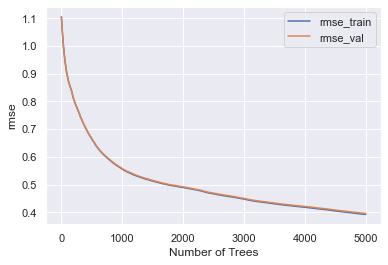

In [32]:
learning_curve = modelXGB.evals_result()
fig, ax = plt.subplots()
ax.plot(learning_curve['validation_0']['rmse'])
ax.plot(learning_curve['validation_1']['rmse'])
plt.legend(['rmse_train', 'rmse_val'])
ax.set_xlabel('Number of Trees')
ax.set_ylabel('rmse')
ax.tick_params(axis = 'both')
plt.show()

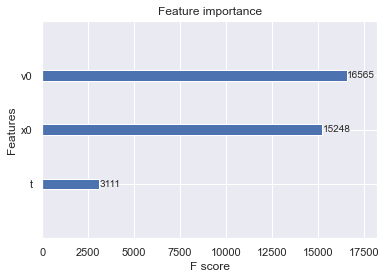

{'v0': 16565, 'x0': 15248, 't': 3111}
as expected, the fifth feature f4 is the least important (it's a random feature)


In [33]:
xgb.plot_importance(modelXGB)
plt.show()

print(modelXGB.get_booster().get_score())